# Ising models and Metropolis-Hastings algorithm

In [136]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

import numpy as np
from numpy.random import rand, random, randint, choice, normal, uniform 

## Ising models: The H atom of phase transitions



$$\boxed{H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i}$$

<br>


$$\boxed{Z=\sum_{[s]}e^{-H([s])/k_B T}}$$

#### Magnetization

- **Total magnetization, $M$**  

$$M([s])=\sum_is_i $$

- **Magnetization per spin $m$** 

$$m([s])=\frac{1}{N}\sum_is_i =\frac{M}{N}$$

#### Heat capacity $C_v$

$$ C_V(T) = \Big (\frac{\partial E}{\partial T} \Big )_V= \frac{1}{k_B T^2} \big(\langle E^2 \rangle-\langle E \rangle^2 \big) $$

#### Susceptibility $\chi$

$$\chi_T=\Big (\frac{\partial M}{\partial B} \Big )_T= \frac{1}{k_B T} \big(\langle M^2 \rangle-\langle M \rangle^2 \big) $$

### Free energy profile

$$Z(M) = \sum_{[s]} e^{-\beta H([s])} \delta (M-M([s]))$$

$$F(M)=-\beta^{-1} log Z(M)$$

Note that $Z(M)$ is a partial sum over states for which magnetization is equal to a particular value $M$ as opposed to the full partition function $Z$ where summation is unrestricted.

### Numerical calculation of thermodynamic quantities

[[ 1  1 -1  1  1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1  1]
 [-1  1  1  1  1 -1 -1  1]
 [ 1  1 -1  1  1  1 -1  1]
 [ 1  1 -1  1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1  1 -1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1]]


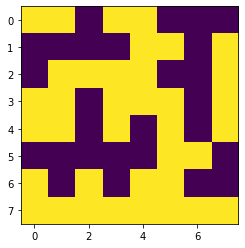

In [24]:
spins = choice([-1,1],size=(8,8))

print(spins)

plt.imshow(spins)

### Enforcing periodic boundary conditions

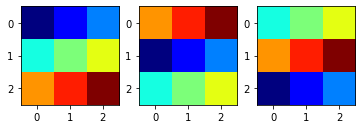

In [20]:
X = np.array([[1, 2 ,3], 
              [4, 5, 6],
              [7, 8, 9]])
Y = np.roll(X, 1, axis=0)
Z = np.roll(X, -1, axis=0)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.imshow(X, cmap='jet')
ax2.imshow(Y, cmap='jet')
ax3.imshow(Z, cmap='jet')

In [31]:
def get_E(spins, J=1, B=0):
    '''Compute energy of spin lattice by lopping over each spin 
    with periodic boundary conditions enforced 
    via numpy roll''' 
      
    z = np.roll(spins, 1, axis = 0) + np.roll(spins, -1, axis = 0) + \
        np.roll(spins, 1, axis = 1) + np.roll(spins, -1, axis = 1)

    E = np.sum( -J*spins*z/4 )
    
    return E - B*np.sum(spins)

def get_E2(spins,N,J,B):   
     
    N =len(spins)
    E = 0
    for i in range(N):
        for j in range(N):   
            z = spins[(i+1)%N, j] + spins[(i-1)%N, j] +\
                spins[i,(j+1)%N]  +  spins[i,(j-1)%N]
            E += -J*z*spins[i,j]/4 
            
    return E - B*np.sum(spins) 


def get_dE(spins, i, j, J=1, B=0):
    '''Compute change in energy of 2D spin lattice 
    after flipping a spin at a location (i,j''' 
    
    N = len(spins)
    
    z  = spins[(i+1)%N, j] + spins[(i-1)%N, j] + \
             spins[i, (j+1)%N] + spins[i, (j-1)%N] 
             
    dE = 2*spins[i,j]*(J*z + B)
    
    return dE
        

In [38]:
#get_E(spins)
#get_dE(spins, 1, 2)

### Sampliing of Boltzmann distribution (NVT). MC vs MCMC

How to compute the expectation value of an observable $A$. In theory everything is simple:

$$P(E_i)=\frac{e^{-\beta E_i}}{Z} = \frac{e^{-\beta E_i}}{\sum_i e^{-\beta E_i}}$$

$$\langle A\rangle = \sum_i A_iP(E_i)$$

**1. Question: What we know and what we want to know?**
- We don't always know the **(micro)states** $i$ of a system.
- We only know **macroscopic quantities:** temperature $T$ with $\beta = 1/(k_BT)$, volume, etc.

**2. Answer: MC sampling**
- Simulate different states of the system with Monte Carlo, according to the thermal probability function

**3. What are challanges?**
- most probabilities $P(E_k)$ are tiny => exponentially small
- there is an extremely large number of possible states


**4. Concludion: We need Importance sampling!**

- Use the Boltzmann probability $P(E_i)$ as probability distribution to generate $N$ samples:

$$\boxed{\langle A\rangle \rightarrow\frac{1}{N}\sum_{i=1}^N \underbrace{A_i}_{{\rm chosen}\ {\rm acc.}\ {\rm to}\ P(E_i)}}$$

**MCMC Simulation** Generating random walks in configuration space of thte system states.  

### Master Equation and Detailed Balance

**Random process:**

$$P(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2)... P_1(X_N)$$

<br>

**Probabilities**

$$P(X_1)$$

$$\sum_{X'} P(X') =1$$

**Markov chain:**

$$p(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2| X_1) \cdot P_2(X_3| X_2)... P_1(X_N | X_{N-1})$$

<br>

**Conditional (transition) probabilities:**

$$T(X_1 \rightarrow X_2) = P(X_2|X_1)$$

$$\sum_{X'} T(X\rightarrow X') =1 $$

**Probability of being at $X$ at $t+\Delta t$ given prior state at $(X',t)$**

$$P(X, t+\Delta t) = \sum_X' P(X', t) T(X' \rightarrow X, t)$$

**Master equation: A continuity equation in probability space.**

$$P(X, t+\Delta t) -P(X,t)= \sum_X' P(X', t) T(X' \rightarrow X, t) - P(X, t)\sum_{X'} T(X\rightarrow X')$$

$$\boxed{\frac{\partial P(X,t)}{\partial t} = \sum_X' P(X', t) w(X' \rightarrow X, t) - \sum_{X'} P(X, t) w(X\rightarrow X')}$$

- $w(X' \rightarrow X, t) = lim_{\Delta t \rightarrow 0}\frac{T(X' \rightarrow X, t)}{\Delta t}$

### Detailed Balance = Equilibrium

<br>

$$\boxed{\frac{\partial P(X,t)}{\partial t}  = \sum_{X'} P(X', t) w_{X'X} - \sum_{X'} P(X, t) w_{X X'}}=0$$

<br>

$$\boxed{ p_i w_{ij} = p_j w_{ji}  }$$

**Master equation for a two state dynamics**

$$\frac{dP(x_1,t)}{dt} = p_1 w_{12} - p_2 w_{21}$$

$$\frac{dP(x_2,t)}{dt} = p_2 w_{21} - p_1 w_{12}$$

### How to pick the moves for Markov chain?

$$[transition] = [move] \cdot [acceptance]$$

$$T(X\rightarrow X') = \alpha_{X X'}\cdot A_{X X'} $$

- $\alpha_{X X'}\geq 0$, $\alpha_{X X'} = \alpha_{X' X}$
<br>

- If $p(X') < p(X)$, $A_{XX'}=\frac{p(X')}{p(X)}$
<br>

- If $p(X') \geq p(X)$, $A_{XX'}=1$

**For 2D Ising model of size $(L,L)$**

- $\alpha_{X X'} = \frac{1}{L^2}$ 

Where $X$ and $X'$ differ in one spin configuration.

## Metropolis algorithm

${\bf i. Initialization.}$ Generate some initiaal configuration for spins $[s_0]=(s_1,...s_N)$. For instnace Choosing random orientation for each spins $(+1, -1)$ or giving them  the same orientation. 

${\bf ii. Attempt\,\, spin\,\, flip.\,\,}$ Pick a spin at random and flip it. E.g multiply by -1 so that +1 state becomes -1 and vice versa. this generated a new configuration $[s_1]$

${\bf iii. Acceptance/Rejection}$ Evaluate energy differene between old configuration $[s_{0}]$ and new one $[s_{1}]$ with flipped spin which has created in previous step. The $\Delta E=E_{1}-E_{0}$ is used for deciding weather the move is accepted or rejected in a way that is consistent with Boltzman distribution: 

$$w=\frac{P[s_{1}]}{P[s_{0}]}=exp\big(-\beta[E_{1}-E_{0}] \big ) $$

This is done by generating a unifor random number $r$ between $[0,1]$ and 

(a) if $r  \leq w$ Accept the spin flip thereby keeping $[s_1]$ and proceeding to try new spin flip via step ii.  

(b) if $r  > w$ reject the spin flip and set  $[s_1]=[s_0]$ and proceeding to try a new spin flip via step ii.

### Code for running 2D ising MCMC Simulations

- If numba is installed, uncomment to benfit from jit acceleration!
- To speed benchmarks to assess how long simulation would take

In [138]:
#from numba import jit
#@jit
def run_ising2d(spins=np.random.choice([-1, 1], size=(20, 20)), 
                T=1, 
                J=1, 
                B=0, 
                n_steps=20000, 
                out_freq=10):
    '''Basic Metropolis Monte Carlo simulator of 2D Ising model
    ---
    spins: 2D numy array
    T, J, B: temperature, coupling constant and magnetic field
    n_steps: simulation steeps
    out_freq: How often to compute and save data
    ---
    Returns:
    Et: Energy over n steps  
    Mt: magnetization over n steps 
    St: spin configurations over n steps 
    '''
    
    # Initialize simulation
    N   = len(spins)
    M_t = np.mean(spins)
    E_t = 0
    for i in range(N):
        for j in range(N): 
            z    = spins[(i+1)%N, j] + spins[(i-1)%N, j] + spins[i,(j+1)%N] + spins[i,(j-1)%N]
            E_t += -1/4 * J * z

    #### Run MC Simulation
    S, E, M = [], [], []
    for step in range(n_steps):
        
        #Pick random spin
        i, j = np.random.randint(N), np.random.randint(N)

        #Compute energy change resulting from a flip of spin at i,j
        z  = spins[(i+1)%N, j] + spins[(i-1)%N, j] + spins[i, (j+1)%N] + spins[i, (j-1)%N] 
        dE = 2*spins[i,j]*(J*z + B)

        #Metropolis condition
        if np.exp(-dE/T) > np.random.rand():
            spins[i,j] *= -1 
            E_t        += dE
            M_t        += 2*spins[i,j]

        #### Save Thermo data
        if step % out_freq == 0:
            M.append(M_t/N)
            E.append(E_t/N)
            S.append(spins.copy())

    return S, E, M

In [139]:
%%timeit
S, E, M = run_ising2d(spins=np.random.choice([-1, 1], size=(40, 40)), 
                T=1, 
                J=1, 
                B=0, 
                n_steps=100000, 
                out_freq=10)

810 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
@widgets.interact(i=(0, 10000-1))
def plot_image(i=0):
    
    fig, ax  = plt.subplots(ncols=3, figsize=(10,4))
    
    ax[0].pcolor(S[i])
    ax[1].plot(E)
    ax[2].plot(M)
    
    ax[0].set(ylabel='$i$', xlabel='j')
    ax[1].set(ylabel='$E$', xlabel='steps')
    ax[2].set(ylabel='$M$', xlabel='steps')
    fig.tight_layout()

interactive(children=(IntSlider(value=0, description='i', max=9999), Output()), _dom_classes=('widget-interact…

### Carry out explorative simulations

$\bf{i.}$ Test the dependence of observables on system size.

$\bf{ii.}$ Test the dependence of observables on initital conditions.

$\bf{iii.}$ Vary intensive parameters, e.g temperature and field strength. Investigate changes in observables such as magnetization, energy, susceptibility, heat capacity.

$\bf{iv.}$ How do we know if simulation has done enough sampling? How do we assess covnergence and errors? 

$\bf{v.}$ Think about alternative ways of accelerating and enhancing the sampling.

#### Parameter sweeps and calculation of second order thermodynamic quantities

In [97]:
def get_Cv(E, T):
    return np.var(E)/T**2

def get_Xi(M, T):
    return np.var(M)/T

In [109]:
# Carry out multiple MC runs at differnet Temperatures. 
# This calculation may take ~5 mins. 
# Think about equilibration, convergence and statistical errors

Ts = np.linspace(1, 4, 20) 
n_equil  = 100000
out = 10

Es, Ms, Cs, Xs = [], [], [], []  

for T in Ts:
    
    S, E, M = run_ising2d(spins=np.random.choice([-1, 1], size=(12, 12)), 
                          T=T, 
                          J=1, 
                          B=0, 
                          n_steps=int(2*n_equil), 
                          out_freq=out)
    
    E = E[n_equil//out:]
    M = M[n_equil//out:]
    
    Es.append(np.mean(E))
    Ms.append(np.mean(M))
    
    Cs.append(get_Cv(E, T)) 
    Xs.append(get_Xi(M, T))

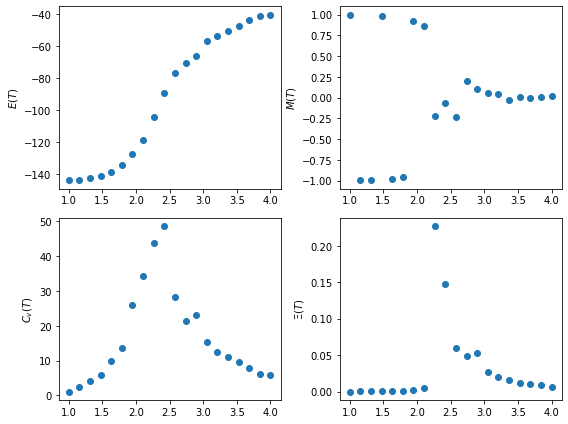

In [114]:
fig, ax  = plt.subplots(ncols=2, nrows=2, figsize=(8,6))

ax[0,0].scatter(Ts, Es)
ax[0,0].set(ylabel='$E(T)$')

ax[0,1].scatter(Ts, Ms)
ax[0,1].set(ylabel='$M(T)$')

ax[1,0].scatter(Ts, Cs)
ax[1,0].set(ylabel='$C_v(T)$')

ax[1,1].scatter(Ts, Xs)
ax[1,1].set(ylabel='$\Xi(T)$')
fig.tight_layout()

### Problems

#### Problem-1

Revisit the example MCMC simulation for determining $\pi$ value. Vary the size of the displacement to determine the optimal size that generates quickest convergence to the value of $\pi$


#### Problem-2 

Carry out MC simulation of 2D ising spin model for various lattice sizes $N= 16,32, 64$ at temperatures above and below critical e.g $T<T_c$ and $T>T_c$.   

- How long does it take to equilibrate system as a function of size and as a function of T?

- Plot some observables as a function of number of samples states to show that the system is carrying out some sort of random walk in the configurational space. 

- How do profiles of Energy vs T, Magnetization vs T and heat capacity vs T, and susceptibility vs T change as a function of size of our lattice. 

- Does $J>0$ and $J<0$ change the nature of phase transition?

#### Problem-3

Compute correlation functions of spin variable, that is how correlated are spins as a function of distance on a lattice, $L$. $C(L)=\langle s_i s_{i+L}\rangle -\langle s_i\rangle \langle s_{i+L}\rangle $ Make sure to account for the periodic boundary conditions! 

> Note that you can pick a special tagged spin and calculate correlation function of taged spin ($s_13$ for instance) with any other as a function of lattice spearation  by averaging over produced MC configurations.  Or you can take advantage of the fact that there are no priviledged spins and average over many spins and average over MC configruations e.g $s_1, s_2, ...$. E.g you can pick a horizontal line of spins and run a summation for each fixed r_ab distance. 

#### Problem-4

Take a 20 by 20 lattice and equilibriate the system with a value of extneral field B equal to +1. 
Now slowly change h to −1 in discrete steps during each of these steps, use the previously equilibriated
configuration as an input to the system to undergo equilibriation again.  

Caluclate average and variance quantities (e.g E, M, C etc). Notice anything interesing :)